<a href="https://colab.research.google.com/github/Herding/Echo/blob/master/CartPoleTabularQLearning_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#           _____                _____                    _____                    _____                    _____                    _____          
#         /\    \              /\    \                  /\    \                  /\    \                  /\    \                  /\    \         
#        /::\    \            /::\    \                /::\    \                /::\    \                /::\    \                /::\    \        
#       /::::\    \           \:::\    \              /::::\    \              /::::\    \              /::::\    \               \:::\    \       
#      /::::::\    \           \:::\    \            /::::::\    \            /::::::\    \            /::::::\    \               \:::\    \      
#     /:::/\:::\    \           \:::\    \          /:::/\:::\    \          /:::/\:::\    \          /:::/\:::\    \               \:::\    \     
#    /:::/__\:::\    \           \:::\    \        /:::/__\:::\    \        /:::/__\:::\    \        /:::/__\:::\    \               \:::\    \    
#    \:::\   \:::\    \          /::::\    \      /::::\   \:::\    \      /::::\   \:::\    \      /::::\   \:::\    \              /::::\    \   
#  ___\:::\   \:::\    \        /::::::\    \    /::::::\   \:::\    \    /::::::\   \:::\    \    /::::::\   \:::\    \    ____    /::::::\    \  
# /\   \:::\   \:::\    \      /:::/\:::\    \  /:::/\:::\   \:::\    \  /:::/\:::\   \:::\____\  /:::/\:::\   \:::\    \  /\   \  /:::/\:::\    \ 
#/::\   \:::\   \:::\____\    /:::/  \:::\____\/:::/  \:::\   \:::\____\/:::/  \:::\   \:::|    |/:::/  \:::\   \:::\____\/::\   \/:::/  \:::\____\
#\:::\   \:::\   \::/    /   /:::/    \::/    /\::/    \:::\  /:::/    /\::/   |::::\  /:::|____|\::/    \:::\  /:::/    /\:::\  /:::/    \::/    /
# \:::\   \:::\   \/____/   /:::/    / \/____/  \/____/ \:::\/:::/    /  \/____|:::::\/:::/    /  \/____/ \:::\/:::/    /  \:::\/:::/    / \/____/ 
#  \:::\   \:::\    \      /:::/    /                    \::::::/    /         |:::::::::/    /            \::::::/    /    \::::::/    /          
#   \:::\   \:::\____\    /:::/    /                      \::::/    /          |::|\::::/    /              \::::/    /      \::::/____/           
#    \:::\  /:::/    /    \::/    /                       /:::/    /           |::| \::/____/               /:::/    /        \:::\    \           
#     \:::\/:::/    /      \/____/                       /:::/    /            |::|  ~|                    /:::/    /          \:::\    \          
#      \::::::/    /                                    /:::/    /             |::|   |                   /:::/    /            \:::\    \         
#       \::::/    /                                    /:::/    /              \::|   |                  /:::/    /              \:::\____\        
#        \::/    /                                     \::/    /                \:|   |                  \::/    /                \::/    /        
#         \/____/                                       \/____/                  \|___|                   \/____/                  \/____/         

# Cartpole Tabular Q Learning

Docs:  
https://github.com/openai/gym/wiki/CartPole-v0

In [0]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [0]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay


In [0]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1005'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1005'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env


# Play around with the environment

In [0]:
env = wrap_env(gym.make('CartPole-v0'))

observations = []
for i_episode in range(1):
    observation = env.reset()
    observations.append(observation)
    for t in range(100):
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        
        # record state, reward, done for printing
        observations.append((observation, reward, done))
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()
for ob in observations: print(ob)
show_video()

Episode finished after 16 timesteps
[-0.02019371 -0.03341369  0.03936376  0.0403443 ]
(array([-0.02086198, -0.22907736,  0.04017065,  0.34518241]), 1.0, False)
(array([-0.02544353, -0.03454918,  0.0470743 ,  0.06543253]), 1.0, False)
(array([-0.02613451,  0.15986735,  0.04838295, -0.21203447]), 1.0, False)
(array([-0.02293717, -0.03591177,  0.04414226,  0.09550959]), 1.0, False)
(array([-0.0236554 ,  0.15855062,  0.04605245, -0.18292625]), 1.0, False)
(array([-0.02048439,  0.3529844 ,  0.04239392, -0.46073306]), 1.0, False)
(array([-0.0134247 ,  0.5474823 ,  0.03317926, -0.73975771]), 1.0, False)
(array([-0.00247505,  0.7421308 ,  0.01838411, -1.02181684]), 1.0, False)
(array([ 0.01236756,  0.93700306, -0.00205223, -1.30867122]), 1.0, False)
(array([ 0.03110762,  1.13215096, -0.02822565, -1.6019958 ]), 1.0, False)
(array([ 0.05375064,  1.32759544, -0.06026557, -1.90334299]), 1.0, False)
(array([ 0.08030255,  1.13317442, -0.09833243, -1.62994826]), 1.0, False)
(array([ 0.10296604,  0.93

In [0]:
print(env.action_space)
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)

Discrete(2)
Box(4,)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


# Discretisation

In [0]:
x = np.array([-0.1, 0.1, 2.4, 3.0, 4.6, 5.5, 6])  # some numbers that we want to see which bin they belong to
bins = np.array(np.linspace(-2.4, 2.4, 3)) # create 3 bins between 0 and 5
out = np.digitize(x, bins)   # convert our inputs to the our bin values
print("bins:", bins.tolist())
print("x:", x.tolist())
print("out:", out)

bins: [-2.4, 0.0, 2.4]
x: [-0.1, 0.1, 2.4, 3.0, 4.6, 5.5, 6.0]
out: [1 2 3 3 3 3 3]


# The Tools

In [0]:
class Epsilon(object):
    def __init__(self, start=1.0, end=0.01, update_decrement=0.01):
        self.start = start
        self.end = end
        self.update_decrement = update_decrement
        self._value = self.start
        self.isTraining = True
    
    def decrement(self, count=1):
        self._value = max(self.end, self._value - self.update_decrement*count)
        return self
        
    def value(self):
        if not self.isTraining:
            return 0.0
        else:
            return self._value
"""
Instantiate object with epsilon starting at 1.0 (100% exploration), final value 0.01 (1% exploration), 
each time we call decrement it'll go down by 0.01. 
If eps.isTraining is set to True then it'll return 0.0 (zero exploration)
"""
eps = Epsilon(start=1.0, end=0.01, update_decrement=0.01)
print(eps.value())
print("decrementing 3 times")
print(eps.decrement().value())
print(eps.decrement().value())
print(eps.decrement().value())
print("decrement 99 times and the lowest it goes to is 0.01")
print(eps.decrement(99).value())
print("Set training = False")
eps.isTraining = False
print(eps.decrement().value())
print("Set training = True")
eps.isTraining = True
print(eps.decrement().value())

1.0
decrementing 3 times
0.99
0.98
0.97
decrement 99 times and the lowest it goes to is 0.01
0.01
Set training = False
0.0
Set training = True
0.01


In [0]:
class QTable():
    def __init__(self, num_actions=4):
        self.num_actions = num_actions
        self.Q = {}
    
    """Q(s, a): get the Q value of (s, a) pair"""
    def get_Q(self, s, a):
        self._check(s)
        return self.Q[s][a]

    """if Q(s) doesn't exist initialize to 0"""
    def _check(self, s):
        if not s in self.Q:
            self.Q[s] = [0.]*self.num_actions
    
    """max Q(s): get the max of all Q value of state s"""
    def get_max_Q(self, s):
        self._check(s)
        return np.max(self.Q[s])
    
    """Q(s, a) = q: update the q value of (s, a) pair"""
    def set_Q(self, s, a, q):
        self._check(s)
        self.Q[s][a] = q
    
    """
    argmax_a Q(s, a): get the action which has the highest Q in state s
    - beware of the scenario where all Q[s] are equal, np.argmax just returns the first one
    """
    def get_max_a_for_Q(self, s):
        self._check(s)
        if np.min(self.Q[s]) == np.max(self.Q[s]):
          return random.choice([i for i in range(self.num_actions)]) # if all values are equal then do a random choice
        else:
          return np.argmax(self.Q[s])
    
    def __str__(self):
        output = []
        for s in self.Q:
            output.append(s.__str__() + ": " + ["{:07.4f}".format(a) for a in self.Q[s]].__str__())
        output.sort()
        return "QTable (number of actions = " + str(self.num_actions) + ", states = " + str(len(output)) + "):\n" + "\n".join(output)

# Exercise: Q Learner for Cartpole
### Suggested progression
- Get agent training loop working with random action
- Convert env state space into discretised states
- Get agent action selection to use epsilon-greedy
- Get agent to store and update Q values

In [0]:
class Agent():
    def __init__(self):
        self.env = gym.make('CartPole-v0')
        self.Q = QTable(num_actions=2)
        self.epsilon = Epsilon(start=1.0, end=0.05, update_decrement=0.002)
        
    def getAction(self, s):
        # TODO: implement epsilon-greedy policy
        
        action = self.env.action_space.sample()
        return action
    
    def train(self, episodes=100):
        # TODO: 
        # - Convert env state space into discretised states
        # - Store and update Q values
        pass
                
    
    def run(self):
        self.env = wrap_env(gym.make('CartPole-v0'))
        self.epsilon.isTraining = False
        s = self.env.reset()
        steps = 0
        while True:
            self.env.render()
            action = self.getAction(s)
            s_1, reward, done, info = self.env.step(action)
            steps += 1
            if done:
                print("Episode finished after {} timesteps".format(steps))
                break
        self.env.close()
        

agent = Agent()
agent.train(episodes=2)
agent.run()

show_video()

Episode finished after 13 timesteps


# Solution 1

In [0]:
class Agent():
    def __init__(self):
        self.env = gym.make('CartPole-v0')
        self.alpha = 0.2
        self.gamma = 0.999
        self.Q = QTable(num_actions=2)
        self.epsilon = Epsilon(start=1.0, end=0.0, update_decrement=0.00001)
        
        # get initial state, divide continuous states into discrete bins
        self.bins = []
        self.bins.append(np.linspace(-2., 2., 3))
        self.bins.append(np.linspace(-10, 10, 1))
        self.bins.append(np.linspace(-math.radians(10), math.radians(10), 5))
        self.bins.append(np.linspace(-math.radians(20), math.radians(20), 3))
        
        self.episode_durations = []
        
    def get_state(self, s):
        return tuple([np.asscalar(np.digitize(s[i], self.bins[i])) for i in range(4)])
    
    def getAction(self, s):
        if np.random.rand() >= self.epsilon.value():
            action = self.Q.get_max_a_for_Q(s)
        else:
            action = self.env.action_space.sample()
        self.epsilon.decrement(1)
        return action
    
    def train(self, episodes=100):
        self.epsilon.isTraining = True
        # run for 100 episodes:"
        for i in range(episodes):
            s = self.get_state(self.env.reset())
            steps = 0
            while True:
                action = self.getAction(s)
                
                s_1, reward, done, info = self.env.step(action)
                s_1 = self.get_state(s_1)
                
                q = self.Q.get_Q(s, action)
                max_q_s_1 = (1 - done) * self.Q.get_max_Q(s_1)
                
                q = q + self.alpha * (reward + self.gamma * max_q_s_1 - q)
                self.Q.set_Q(s, action, q)
                s = s_1
                
                steps += 1
                if done:
#                     print("Training episode finished after {} timesteps".format(steps))
                    break
            self.episode_durations.append(steps)
                
    
    def run(self):
        self.env = wrap_env(gym.make('CartPole-v0'))
        self.epsilon.isTraining = False
        s = self.env.reset()
        steps = 0
        while True:
            self.env.render()
            action = self.getAction(self.get_state(s))
            s_1, reward, done, info = self.env.step(action)
            s = s_1
            steps += 1
            if done:
                print("Episode finished after {} timesteps".format(steps))
                break
        self.env.close()

agent = Agent()
agent.train(episodes=4000)

plt.figure(figsize=(10, 5))
plt.title('Training...')
plt.xlabel('Episode')
plt.ylabel('Duration')
plt.plot(agent.episode_durations)

# print(agent.Q)

In [0]:
agent.run()
show_video()

Episode finished after 200 timesteps


# Solution 2 - modify reward

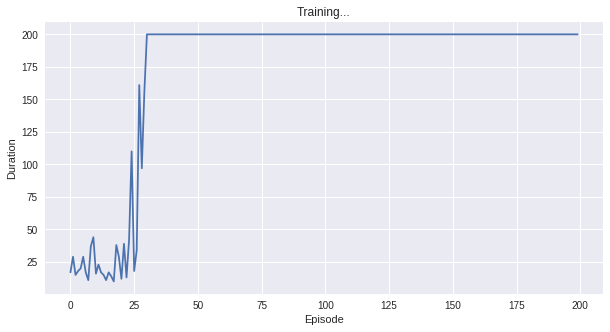

In [0]:
class Agent():
    def __init__(self):
        self.env = gym.make('CartPole-v0')
        self.alpha = 0.2
        self.gamma = 0.999
        self.Q = QTable(num_actions=2)
        self.epsilon = Epsilon(start=1.0, end=0.0, update_decrement=0.001)
        
        # get initial state, divide continuous states into discrete bins
        self.bins = []
        self.bins.append(np.linspace(-10, 10, 1))
        self.bins.append(np.linspace(-10, 10, 1))
        self.bins.append(np.linspace(-math.radians(12), math.radians(12), 5))
        self.bins.append(np.linspace(-math.radians(20), math.radians(20), 5))
        
        self.episode_durations = []
        
    def get_state(self, s):
        return tuple([np.asscalar(np.digitize(s[i], self.bins[i])) for i in range(4)])
    
    def getAction(self, s):
        if np.random.rand() >= self.epsilon.value():
            action = self.Q.get_max_a_for_Q(s)
        else:
            action = self.env.action_space.sample()
        self.epsilon.decrement(1)
        return action
    
    def train(self, episodes=100):
        self.epsilon.isTraining = True
        # run for 100 episodes:"
        for i in range(episodes):
            s = self.get_state(self.env.reset())
            steps = 0
            while True:
                action = self.getAction(s)
                
                s_1, reward, done, info = self.env.step(action)
                s_1 = self.get_state(s_1)
                
                q = self.Q.get_Q(s, action)
                max_q_s_1 = (1 - done) * self.Q.get_max_Q(s_1)
                
                if done and steps < 199:
                  reward = -100
                
                q = q + self.alpha * (reward + self.gamma * max_q_s_1 - q)
                self.Q.set_Q(s, action, q)
                s = s_1
                
                steps += 1
                if done:
#                     print("Training episode finished after {} timesteps".format(steps))
                    break
            self.episode_durations.append(steps)
                
    
    def run(self):
        self.env = wrap_env(gym.make('CartPole-v0'))
        self.epsilon.isTraining = False
        s = self.env.reset()
        steps = 0
        while True:
            self.env.render()
            action = self.getAction(self.get_state(s))
            s_1, reward, done, info = self.env.step(action)
            s = s_1
            steps += 1
            if done:
                print("Episode finished after {} timesteps".format(steps))
                break
        self.env.close()

agent = Agent()
agent.train(episodes=200)

plt.figure(figsize=(10, 5))
plt.title('Training...')
plt.xlabel('Episode')
plt.ylabel('Duration')
plt.plot(agent.episode_durations)

# print(agent.Q)

In [0]:
agent.run()
show_video()

Episode finished after 200 timesteps
